In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_all=pd.read_csv("./data/Data-Collisions.csv")

/Users/schona/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("The size of raw datset: ", df_all.shape)

The size of raw datset:  (194673, 38)


In [4]:
df=df_all[['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','ROADCOND','LIGHTCOND','WEATHER']]
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,ROADCOND,LIGHTCOND,WEATHER
0,2,Intersection,Angles,2,2,At Intersection (intersection related),Wet,Daylight,Overcast
1,1,Block,Sideswipe,2,2,Mid-Block (not related to intersection),Wet,Dark - Street Lights On,Raining
2,1,Block,Parked Car,4,3,Mid-Block (not related to intersection),Dry,Daylight,Overcast
3,1,Block,Other,3,3,Mid-Block (not related to intersection),Dry,Daylight,Clear
4,2,Intersection,Angles,2,2,At Intersection (intersection related),Wet,Daylight,Raining


In [5]:
print("Data shape before removing NaN: ",df.shape)
df.dropna(how='any',inplace=True)
print("Data shape after removing NaN: ",df.shape)

Data shape before removing NaN:  (194673, 9)
Data shape after removing NaN:  (182895, 9)


/Users/schona/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
drop_i1 = df[((df.COLLISIONTYPE == 'Other') | (df.JUNCTIONTYPE == 'Unknown'))].index
df.drop(drop_i1, inplace=True)
print("Other and Unknown property removed in COLLISIONTYPE and JUNCTIONTYPE", df.shape)
drop_i2 = df[((df.ROADCOND == 'Unknown') | (df.ROADCOND == 'Other'))].index
df.drop(drop_i2, inplace=True)
print("Other and Unknown property removed in ROADCOND", df.shape)
drop_i3 = df[((df.LIGHTCOND == 'Unknown') | (df.LIGHTCOND == 'Other'))].index
df.drop(drop_i3, inplace=True)
print("Other and Unknown property removed in LIGHTCOND", df.shape)
drop_i4 = df[((df.WEATHER == 'Unknown') | (df.WEATHER == 'Other'))].index
df.drop(drop_i4, inplace=True)
print("Other and Unknown property removed in WEATHER", df.shape)

Other and Unknown property removed in COLLISIONTYPE and JUNCTIONTYPE (159932, 9)
Other and Unknown property removed in ROADCOND (148895, 9)
Other and Unknown property removed in LIGHTCOND (146307, 9)
Other and Unknown property removed in WEATHER (145369, 9)


/Users/schona/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,ROADCOND,LIGHTCOND,WEATHER
0,2,Intersection,Angles,2,2,At Intersection (intersection related),Wet,Daylight,Overcast
1,1,Block,Sideswipe,2,2,Mid-Block (not related to intersection),Wet,Dark - Street Lights On,Raining
2,1,Block,Parked Car,4,3,Mid-Block (not related to intersection),Dry,Daylight,Overcast
4,2,Intersection,Angles,2,2,At Intersection (intersection related),Wet,Daylight,Raining
5,1,Intersection,Angles,2,2,At Intersection (intersection related),Dry,Daylight,Clear


In [8]:
df[['PERSONCOUNT']].mean()

PERSONCOUNT    2.616087
dtype: float64

In [9]:
df[['PERSONCOUNT']].std()

PERSONCOUNT    1.384242
dtype: float64

In [10]:
df[['PERSONCOUNT']].max()

PERSONCOUNT    54
dtype: int64

In [11]:
df[['VEHCOUNT']].mean()

VEHCOUNT    2.050637
dtype: float64

In [12]:
df[['VEHCOUNT']].std()

VEHCOUNT    0.533753
dtype: float64

In [13]:
df[['VEHCOUNT']].max()

VEHCOUNT    12
dtype: int64

In [14]:
df[['VEHCOUNT']].min()

VEHCOUNT    0
dtype: int64

In [15]:
df_countable=df[['SEVERITYCODE','PERSONCOUNT','VEHCOUNT']]
df_countable.head()

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT
0,2,2,2
1,1,2,2
2,1,4,3
4,2,2,2
5,1,2,2


In [16]:
df_addr=df[['SEVERITYCODE','ADDRTYPE']]
df_addr.head()

,SEVERITYCODE,ADDRTYPE
0,2,Intersection
1,1,Block
2,1,Block
4,2,Intersection
5,1,Intersection


In [17]:
df_addr_oh=pd.get_dummies(df_addr['ADDRTYPE'])
df_addr_oh.head()

,Alley,Block,Intersection
0,0,0,1
1,0,1,0
2,0,1,0
4,0,0,1
5,0,0,1


In [18]:
df_addr_oh['SEVERITYCODE']=df_addr.SEVERITYCODE
df_addr_oh.head()

,Alley,Block,Intersection,SEVERITYCODE
0,0,0,1,2
1,0,1,0,1
2,0,1,0,1
4,0,0,1,2
5,0,0,1,1


In [19]:
df_addr_oh.values

array([[0, 0, 1, 2],
       [0, 1, 0, 1],
       [0, 1, 0, 1],
       ...,
       [0, 0, 1, 2],
       [0, 0, 1, 2],
       [0, 1, 0, 1]])

In [20]:
X=df_addr_oh[['Alley','Block','Intersection']].values
X[0:5]

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [21]:
y=df_addr_oh['SEVERITYCODE']
y[0:5]

0    2
1    1
2    1
4    2
5    1
Name: SEVERITYCODE, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [23]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset)
yhat_svm = clf.predict(X_testset)
yhat_svm[0:5]

/Users/schona/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 1, 1, 1, 1])

In [26]:
from sklearn import metrics
from sklearn.metrics import f1_score
print("Train set Accuracy: ", metrics.accuracy_score(y_trainset, y_trainset))
print("Test set Accuracy: ", metrics.accuracy_score(y_testset, yhat_svm))
print("f1_score of support vector machine: ", f1_score(y_testset, yhat_svm))

Train set Accuracy:  1.0
Test set Accuracy:  0.66017747815918
f1_score of support vector machine:  0.7953095218364133


In [29]:
yhat_svm[0:1000]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

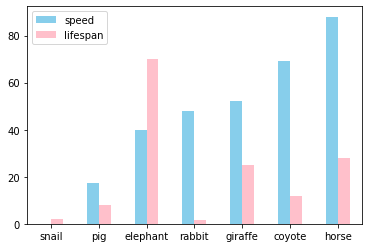

In [34]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant','rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0,color={"speed": "skyblue", "lifespan": "pink"})